![img](./assets/mlp_compare_to_cnn.jpeg)

In [49]:
from keras.src.datasets import mnist
from keras.src import utils
import numpy as np

np.random.seed(10)

In [50]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

将 features 转换为 6000 * 28 * 28 * 1 的4维矩阵

In [51]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype("float32")
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype("float32")

标准化

In [52]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

OneHot Encoding 转换

In [53]:
y_TrainOneHot = utils.to_categorical(y_Train)
y_TestOneHot = utils.to_categorical(y_Test)

In [54]:
from keras.src.models import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(filters=16,
                 kernel_size=(5, 5),
                 padding="same",
                 input_shape=(28, 28, 1),
                 activation="relu"))

In [57]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [58]:
model.add(Conv2D(filters=36,
                 kernel_size=(5, 5),
                 padding="same",
                 activation="relu"))

In [59]:
model.add((MaxPooling2D(pool_size=(2, 2))))

In [60]:
model.add(Dropout(0.25))

In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(128, activation="relu"))

In [63]:
model.add(Dropout(0.5))

In [64]:
model.add(Dense(10, activation="softmax"))

In [65]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 36)     │        14,436 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 36)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1764)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       225,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,062 (945.55 KB)

 Trainable params: 242,062 (945.55 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [67]:
train_history = model.fit(x=x_Train4D_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=300,
                          verbose=2)

Epoch 1/10
160/160 - 9s - 57ms/step - accuracy: 0.8552 - loss: 0.4708 - val_accuracy: 0.9721 - val_loss: 0.0942
Epoch 2/10
160/160 - 8s - 51ms/step - accuracy: 0.9620 - loss: 0.1265 - val_accuracy: 0.9793 - val_loss: 0.0650
Epoch 3/10
160/160 - 8s - 53ms/step - accuracy: 0.9728 - loss: 0.0915 - val_accuracy: 0.9849 - val_loss: 0.0494
Epoch 4/10
160/160 - 8s - 51ms/step - accuracy: 0.9785 - loss: 0.0726 - val_accuracy: 0.9879 - val_loss: 0.0413
Epoch 5/10
160/160 - 8s - 52ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 6/10
160/160 - 9s - 54ms/step - accuracy: 0.9832 - loss: 0.0553 - val_accuracy: 0.9894 - val_loss: 0.0359
Epoch 7/10
160/160 - 9s - 54ms/step - accuracy: 0.9847 - loss: 0.0507 - val_accuracy: 0.9907 - val_loss: 0.0326
Epoch 8/10
160/160 - 9s - 58ms/step - accuracy: 0.9868 - loss: 0.0440 - val_accuracy: 0.9908 - val_loss: 0.0318
Epoch 9/10
160/160 - 9s - 55ms/step - accuracy: 0.9876 - loss: 0.0423 - val_accuracy: 0.9911 - val_loss:

In [68]:
import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

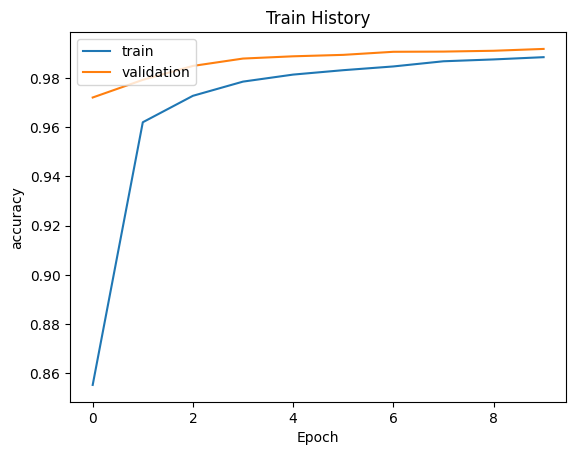

In [69]:
show_train_history(train_history, "accuracy", "val_accuracy")

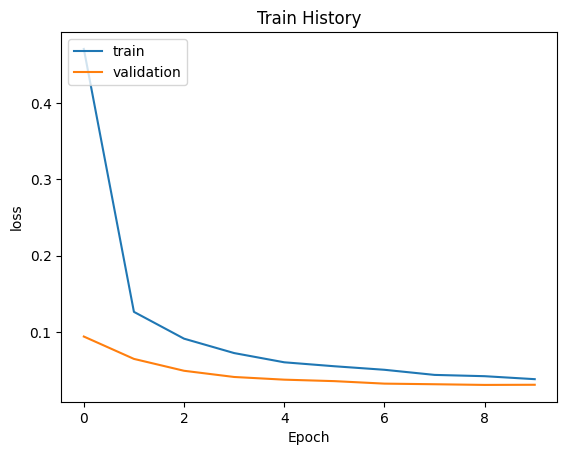

In [70]:
show_train_history(train_history, "loss", "val_loss")

In [71]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0248


0.9922999739646912

In [72]:
predictions = model.predict(x_Test4D_normalize)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [73]:
predicted_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [74]:
def plot_images_labels_prediction(image, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(image[idx], cmap="binary")
        title = "label = " + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

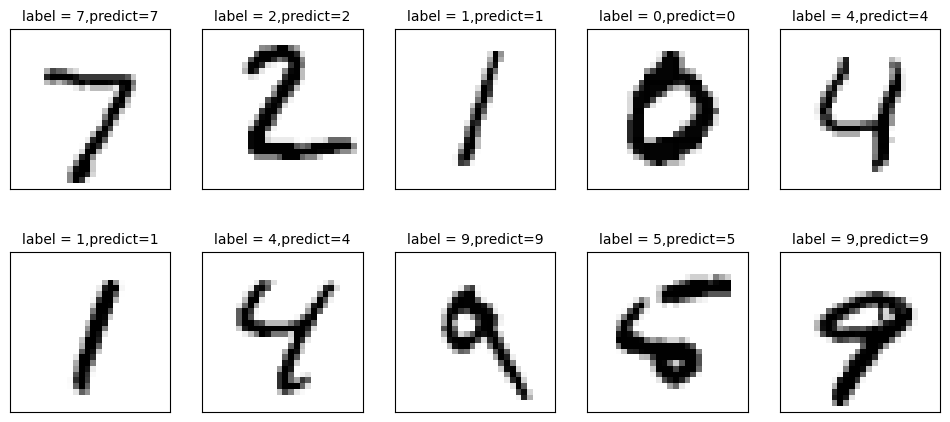

In [75]:
plot_images_labels_prediction(x_Test, y_Test, predicted_classes, idx=0)

In [76]:
import pandas as pd

pd.crosstab(y_Test, predicted_classes, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1133,1,0,0,0,1,0,0,0
2,2,0,1025,0,2,0,0,1,2,0
3,0,0,2,1001,0,5,0,1,1,0
4,0,0,0,0,978,0,1,0,1,2
5,2,0,0,3,0,883,2,0,1,1
6,2,2,0,0,1,0,951,0,2,0
7,0,2,5,2,0,0,0,1018,1,0
8,2,1,0,0,0,1,0,0,969,1
